
# **Wavelet Transform**

*    Wavelet Transform is a mathematical technique used in signal processing to analyze and represent data at different scales or resolutions. It provides a way to decompose a signal into its constituent parts, making it easier to examine its frequency components over time.
***Key concepts***

1. Wavelets: These are small waves with limited duration and are used as basis functions in the transform. Unlike sinusoids in the Fourier Transform, wavelets can be localized in both time and frequency.

2. Scaling and Translation: Wavelet transforms involve scaling (stretching or compressing) and translating (shifting) the wavelet function to analyze different parts of the signal at various resolutions.

3. **Continuous Wavelet Transform (CWT)**: It provides a continuous representation of the signal in both time and frequency.
4. **Discrete Wavelet Transform (DWT)**: It provides a discrete representation of the signal, making it suitable for digital signal processing. It involves filter banks to decompose the signal into approximation and detail coefficients at various levels.

5. Multiresolution Analysis (MRA): This concept involves analyzing a signal at different resolutions by decomposing it into a coarse approximation and finer details. It is particularly useful in applications like image compression and denoising.


* ***Applications of Wavelet Transform***
1. Signal and Image Processing: Used for compression, denoising, and feature extraction.
2. Time-Frequency Analysis: Analyzes non-stationary signals where frequency components vary over time.
3. Medical Imaging: Enhances and compresses medical images, like MRI and CT scans.
4. Data Compression: Used in JPEG2000 for image compression.
5. Finance: Analyzes and predicts market trends by decomposing financial time series data.







*PyWavelets is open source wavelet transform software for Python. It combines a simple high level interface with low level C and Cython performance.*

# Installation of pywavelets
*source:https://pywavelets.readthedocs.io/en/latest/install.html

In [3]:
! pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 45.8 MB/s eta 0:00:00


In [4]:
import pywt

# pywt description of familites

1. Haar Wavelets (haar):The simplest and most basic wavelet.
Discrete, orthogonal, and compactly supported.
Daubechies Wavelets (db):

Orthogonal wavelets with a high number of vanishing moments.
Defined by a parameter indicating the number of vanishing moments.
Examples: db1 (which is the same as haar), db2, db3, etc.

2. Symlets (sym): Symmetric wavelets designed to have properties similar to Daubechies wavelets but with improved symmetry.
Examples: sym2, sym3, etc.

3. Biorthogonal Wavelets (bior): Biorthogonal wavelets that provide both symmetric wavelet functions and dual wavelets.
Used in applications requiring perfect reconstruction.
Examples: bior1.1, bior1.3, bior2.2, etc.

4. Reverse Biorthogonal Wavelets (rbio): Similar to biorthogonal wavelets but with the reverse order of filters.
Examples: rbio1.1, rbio1.3, rbio2.2, etc.

5. Meyer Wavelets (meyer): A family of wavelets that are compactly supported in the frequency domain but not in the time domain.

6. Gaussian Wavelets (gaus): Continuous wavelets derived from the Gaussian function.
Examples: gaus1, gaus2, etc.

7. Mexican Hat Wavelets (mexh): Also known as Ricker wavelets.
Derivative of the Gaussian function.

8. Morlet Wavelets (morl): A complex sinusoidal wave modulated by a Gaussian window.

9. Complex Gaussian Wavelets (cgau) : Complex wavelets derived from the Gaussian function.
Examples: cgau1, cgau2, etc.

10. Shannon Wavelets (shan): Continuous wavelets defined by the sinc function and its derivatives.

11. Frequency B-Spline Wavelets (fbsp): Frequency B-spline wavelets.

12. Complex Morlet Wavelets (cmor): Complex versions of Morlet wavelets.

13. Coiflets (coif): Orthogonal wavelets designed by Ingrid Daubechies with both the wavelet function and its scaling function having vanishing moments.
Examples: coif1, coif2, etc.

In [5]:
print(pywt.families())

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


In [6]:
for family in pywt.families():
    print(family,':',pywt.wavelist(family))

haar : ['haar']
db : ['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']
sym : ['sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']
coif : ['coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17']
bior : ['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8']
rbio : ['rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8'

In [10]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

In [11]:
w1=pywt.Wavelet('db2')
print(w1)

Wavelet db2
  Family name:    Daubechies
  Short name:     db
  Filters length: 4
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [12]:
# Generate a sample signal
t = np.linspace(0, 1, 400)
signal = np.sin(2 * np.pi * 7 * t) + np.sin(2 * np.pi * 13 * t) + np.random.randn(400)


**filter_bank:** a filter bank is a collection of filters used to decompose a signal into various frequency components. These filters include low-pass and high-pass filters, which are applied recursively to achieve multi-level decomposition of the signal. Each level of decomposition separates the signal into approximation and detail coefficients.

In [14]:
w1.filter_bank

([-0.12940952255126037,
  0.2241438680420134,
  0.8365163037378079,
  0.48296291314453416],
 [-0.48296291314453416,
  0.8365163037378079,
  -0.2241438680420134,
  -0.12940952255126037],
 [0.48296291314453416,
  0.8365163037378079,
  0.2241438680420134,
  -0.12940952255126037],
 [-0.12940952255126037,
  -0.2241438680420134,
  0.8365163037378079,
  -0.48296291314453416])

**Key Components of a Filter Bank:**

1. Low-Pass Filter (LPF):

Extracts the low-frequency components (approximation) of the signal.
Typically denoted as ℎ

2. High-Pass Filter (HPF):

Extracts the high-frequency components (detail) of the signal.
Typically denoted as 𝑔

3. Downsampling:

Reduces the sampling rate by half after filtering.
Keeps the decomposition computationally efficient.
Filter Bank Process:
4. Decomposition:

The original signal is passed through both LPF and HPF.
The outputs are then downsampled by a factor of 2.
This process is repeated for the approximation coefficients to obtain multi-level decomposition.

5. Reconstruction:

The process of combining approximation and detail coefficients to reconstruct the original signal.
Involves upsampling the coefficients and passing them through synthesis filters (reversed and time-shifted versions of the analysis filters).







***
1. Original Signal: The composite signal consisting of sine waves and noise.
2. Approximation Coefficients (cA): The low-frequency components of the signal extracted using the 'db1' wavelet.
3. Detail Coefficients (cD): The high-frequency components of the signal extracted using the 'db1' wavelet.
4. Reconstructed Signal: The signal reconstructed from the approximation and detail coefficients.***

Text(0.5, 1.0, 'Detail Coefficients')

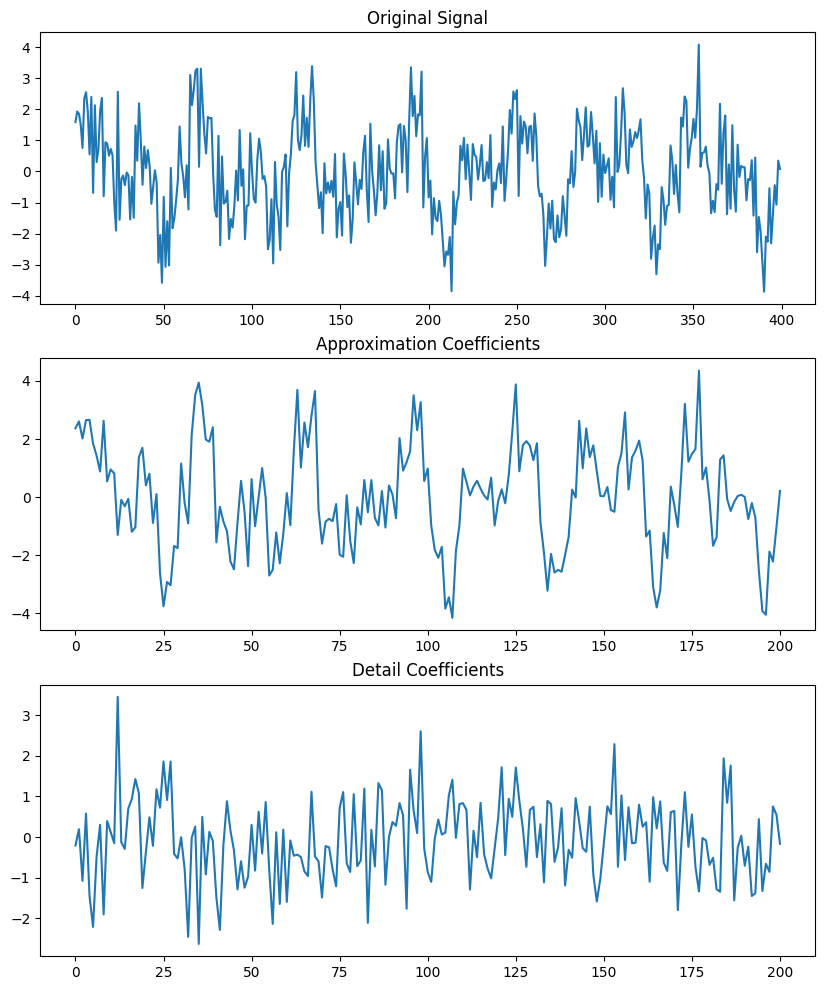

In [22]:


# Perform single-level decomposition
coeffs = pywt.dwt(signal, w1)
cA, cD = coeffs

# Plot the original, approximation, detail, and reconstructed signals
fig, axs = plt.subplots(3, 1, figsize=(10, 12))


axs[0].plot(signal)
axs[0].set_title('Original Signal')

axs[1].plot(cA)
axs[1].set_title('Approximation Coefficients')

axs[2].plot(cD)
axs[2].set_title('Detail Coefficients')




In [16]:
# Reconstruction from approximation and detail coefficients
reconstructed_signal = pywt.idwt(cA, cD, w1)


Reconstructed Signal


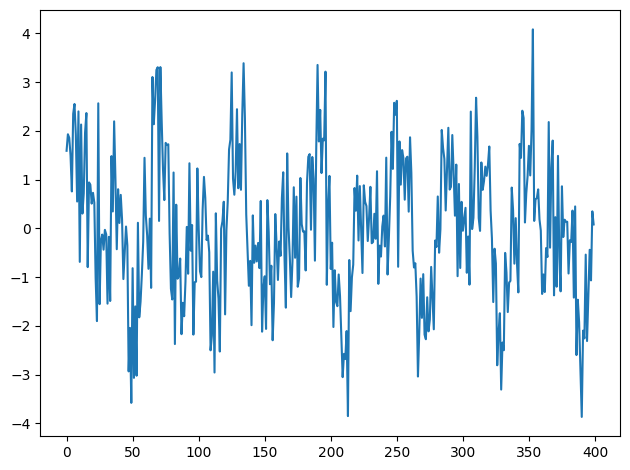

In [26]:
# Plot the original, approximation, detail, and reconstructed signals
print("Reconstructed Signal")
plt.plot(reconstructed_signal)

plt.tight_layout()
plt.show()